In [660]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [663]:
#Read in the csv file and convert to a Pandas dataframe
shangahai_rank_df = pd.read_excel("Data/shanghai Ranking.xlsx")
times_rank_df = pd.read_excel("Data/Times Higher Education.xlsx")
world_rank_df = pd.read_excel("Data/Word Rank University.xlsx")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [665]:
shangahai_rank_df

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0,http://www.shanghairanking.com/_uni/logo/2ab2f...,http://www.shanghairanking.com/institution/uni...
996,901-1000,Warsaw University of Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/a347c...,http://www.shanghairanking.com/institution/war...
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/d...,http://www.shanghairanking.com/institution/wes...
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/ed480...,http://www.shanghairanking.com/institution/wro...


In [668]:
times_rank_df

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,https://www.timeshighereducation.com/world-uni...,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,https://www.timeshighereducation.com/world-uni...,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,https://www.timeshighereducation.com/world-uni...,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,https://www.timeshighereducation.com/world-uni...,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


In [670]:
world_rank_df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [673]:
shangahai_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [675]:
shangahai_rank_df.describe()

,Total Score
count,1000.000000
mean,5.943500
std,12.379624
min,0.000000
25%,0.000000
50%,0.000000
75%,7.500000
max,100.000000


In [677]:
shangahai_rank_df.describe(include="object")

,Ranking,University Name,National/Regional Rank,LOGO,University Detail
count,1000,1000,1000,1000,1000
unique,93,1000,136,1000,1000
top,201-300,Yantai University,1,http://www.shanghairanking.com/_uni/logo/78347...,http://www.shanghairanking.com/institution/yan...
freq,100,1,59,1,1


In [679]:
times_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [681]:
times_rank_df.describe()

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [683]:
times_rank_df.describe(include="object")

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1591,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,64,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Zonguldak Bülent Ecevit University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


In [685]:
world_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [687]:
world_rank_df.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [689]:
world_rank_df.describe(include="object")

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,2000,95,439,1030,262,1935
top,2000Top 9.8%,Gebze Technical University,USA,-,-,-,-
freq,1,1,332,1562,967,1727,66


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [694]:
# Yes This Is What Customer Ask For

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [697]:
# Yes This Is What Customer Ask For

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [704]:
shangahai_rank_df.duplicated().sum()

0

In [706]:
times_rank_df.duplicated().sum()

0

In [708]:
world_rank_df.duplicated().sum()

0

In [710]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [713]:
shangahai_rank_df.isnull().sum()

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
LOGO                      0
University Detail         0
dtype: int64

In [715]:
times_rank_df.isnull().sum()

Rank                                 0
University Name                      0
ranking-institution-title href      91
Location                            91
sdg-score-multi__number            724
sdg-score-multi__value             724
sdg-score-multi__number 2          765
sdg-score-multi__value 2           766
sdg-score-multi__number 3          779
sdg-score-multi__value 3           786
sdg-score-multi__value 4             8
scores                               0
sdg-score-multi__number 5         1026
sdg-score-multi__value 5          1034
sdg-score-multi__number 6         1093
sdg-score-multi__value 6          1095
sdg-score-multi__number 7         1152
sdg-score-multi__value 7          1152
sdg-score-multi__number 8         1108
sdg-score-multi__value 8          1108
dtype: int64

In [717]:
world_rank_df.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [719]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [722]:
# check columns types 

In [724]:
shangahai_rank_df

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0,http://www.shanghairanking.com/_uni/logo/2ab2f...,http://www.shanghairanking.com/institution/uni...
996,901-1000,Warsaw University of Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/a347c...,http://www.shanghairanking.com/institution/war...
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/d...,http://www.shanghairanking.com/institution/wes...
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/ed480...,http://www.shanghairanking.com/institution/wro...


In [726]:
times_rank_df

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,https://www.timeshighereducation.com/world-uni...,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,https://www.timeshighereducation.com/world-uni...,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,https://www.timeshighereducation.com/world-uni...,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,https://www.timeshighereducation.com/world-uni...,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


In [728]:
world_rank_df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [730]:
# go to clean them 

In [732]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [735]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [737]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [740]:
# Which universities are ranked in the top 10 globally ?

In [742]:
shangahai_rank_df[['Ranking', 'University Name']].head(10)

,Ranking,University Name
0,1,Harvard University
1,2,Stanford University
2,3,Massachusetts Institute of Technology (MIT)
3,4,University of Cambridge
4,5,"University of California, Berkeley"
5,6,Princeton University
6,7,University of Oxford
7,8,Columbia University
8,9,California Institute of Technology
9,10,University of Chicago


In [744]:
times_rank_df[['Rank', 'University Name ']].head(10)

,Rank,University Name
0,1,Western Sydney University
1,2,University of Manchester
2,3,Queen’s University
3,4,Universiti Sains Malaysia
4,5,University of Tasmania
5,6,Arizona State University (Tempe)
6,=7,University of Alberta
7,=7,RMIT University
8,=9,Aalborg University
9,=9,University of Victoria


In [746]:
world_rank_df[['World Rank', 'University Names']].head(10)

,World Rank,University Names
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...
2,3Top 0.1%,Stanford University\n Education: A+; Employab...
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...
5,6Top 0.1%,Princeton University\n Education: A+; Employa...
6,7Top 0.1%,University of Chicago\n Education: A+; Employ...
7,8Top 0.1%,Columbia University\n Education: A+; Employab...
8,9Top 0.1%,University of Pennsylvania\n Education: A; Em...
9,10Top 0.1%,Yale University\n Education: A+; Employabilit...


In [748]:
# Which universities are ranked in the top 10 for employment outcomes?

In [845]:
world_rank_df[world_rank_df['Employability Rank'] > 0].sort_values('Employability Rank', ascending = True).head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
1,1,Harvard University,USA,1,1,1,1,1,100.0
120,120,INSEAD,France,6,0,2,0,1710,81.1
211,211,Institut national du service public,France,11,0,3,0,0,78.5
3,3,Stanford University,USA,3,11,4,2,2,95.2
274,274,China Europe International Business School,China,32,0,5,0,0,77.3
13,13,University of Tokyo,Japan,1,37,6,113,30,89.8
280,280,HEC Paris,France,15,0,7,0,0,77.2
9,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
45,45,Institut Polytechnique de Paris,France,5,102,9,188,370,85.1
406,406,International Institute for Management Develop...,Switzerland,8,0,10,0,0,75.3


In [753]:
# What positions do universities in Saudi Arabia hold within the global rankings?

In [755]:
shangahai_rank_df[shangahai_rank_df['National/Regional Rank'] == 'Saudi Arabia']

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail


In [757]:
times_rank_df[times_rank_df['Location'] == 'Saudi Arabia']

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
136,101–200,King Abdullah University of Science and Techno...,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,NaN,NaN,14.0,93.7,NaN,NaN,95.9,82.2–88.2,NaN,NaN,6.0,88.0,NaN,NaN,7.0,70.9
137,101–200,King Faisal University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,2.0,77.7,7.0,78.6,NaN,NaN,81.9–86.9,82.2–88.2,1.0,80.1,NaN,NaN,NaN,NaN,NaN,NaN
164,101–200,Prince Mohammad Bin Fahd University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,10.0,65.2–73.3,8.0,62.4–66.3,14.0,73.7,90.7,82.2–88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,201–300,AlMaarefa University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,NaN,NaN,1.0,71.5,NaN,NaN,81.9–86.9,76.8–82.1,NaN,NaN,8.0,62.4–66.3,3.0,81.6,NaN,NaN
243,201–300,Imam Abdulrahman Bin Faisal University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,5.0,61.5–66.9,NaN,NaN,6.0,73.7,89.0,76.8–82.1,3.0,89.6,NaN,NaN,NaN,NaN,NaN,NaN
244,201–300,Imam Mohammad Ibn Saud Islamic University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,NaN,NaN,16.0,70.0–77.0,NaN,NaN,81.9–86.9,76.8–82.1,8.0,62.4–66.3,NaN,NaN,NaN,NaN,4.0,82.2
251,201–300,King Fahd University of Petroleum and Minerals,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,8.0,75.0,NaN,NaN,14.0,75.0,81.9–86.9,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,9.0,95.6
378,301–400,Prince Sultan University (PSU),https://www.timeshighereducation.com/world-uni...,Saudi Arabia,8.0,74.6,16.0,63.7–69.9,5.0,43.7–51.5,75.6–81.7,72.7–76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,401–600,King Khalid University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,6.0,69.4,NaN,NaN,NaN,NaN,53.4–61.0,66.9–72.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,401–600,Qassim University,https://www.timeshighereducation.com/world-uni...,Saudi Arabia,1.0,79.1,8.0,57.8–62.2,4.0,73.1,81.9–86.9,66.9–72.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [759]:
world_rank_df[world_rank_df['Location '] == 'Saudi Arabia']

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245Top 1.2%,King Abdulaziz University,Saudi Arabia,1,-,1330,-,186,77.8
278,279Top 1.4%,King Abdullah University of Science and Techno...,Saudi Arabia,2,-,-,171,297,77.2
351,352Top 1.8%,King Saud University,Saudi Arabia,3,-,344,-,332,76.1
656,657Top 3.3%,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,-,107,-,792,72.8
1310,1311Top 6.4%,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,-,-,-,1255,68.8
1446,1447Top 7.1%,King Khalid University,Saudi Arabia,6,-,-,-,1385,68.1
1508,1509Top 7.4%,Taif University,Saudi Arabia,7,-,-,-,1445,67.9
1546,1547Top 7.6%,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,-,-,-,1484,67.7
1585,1586Top 7.8%,Taibah University,Saudi Arabia,9,-,-,-,1520,67.5
1710,1711Top 8.4%,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,-,-,-,1636,67.0


In [761]:
UoS_1 = times_rank_df[times_rank_df['Location'] == 'Saudi Arabia']

In [763]:
UoS_2 = world_rank_df[world_rank_df['Location '] == 'Saudi Arabia']

In [765]:
UoS_1 = list(UoS_1['University Name '])

In [767]:
UoS_2 = list(UoS_2['University Names'])

In [769]:
shangahai_rank_df[shangahai_rank_df['University Name'].isin(UoS_1)]

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
631,601-700,King Khalid University,6,0.0,http://www.shanghairanking.com/_uni/logo/1486b...,http://www.shanghairanking.com/institution/kin...
855,801-900,Prince Sattam Bin Abdulaziz University,7,0.0,http://www.shanghairanking.com/_uni/logo/d5282...,http://www.shanghairanking.com/institution/pri...


In [771]:
shangahai_rank_df[shangahai_rank_df['University Name'].isin(UoS_2)]

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
109,101-150,King Abdulaziz University,1-2,0.0,http://www.shanghairanking.com/_uni/logo-jpg/c...,http://www.shanghairanking.com/institution/kin...
110,101-150,King Saud University,1-2,0.0,http://www.shanghairanking.com/_uni/logo/a8ed5...,http://www.shanghairanking.com/institution/kin...
222,201-300,King Abdullah University of Science and Techno...,3,0.0,http://www.shanghairanking.com/_uni/logo/aebd2...,http://www.shanghairanking.com/institution/kin...
446,401-500,Taif University,4-5,0.0,http://www.shanghairanking.com/_uni/logo/df754...,http://www.shanghairanking.com/institution/tai...
631,601-700,King Khalid University,6,0.0,http://www.shanghairanking.com/_uni/logo/1486b...,http://www.shanghairanking.com/institution/kin...
855,801-900,Prince Sattam Bin Abdulaziz University,7,0.0,http://www.shanghairanking.com/_uni/logo/d5282...,http://www.shanghairanking.com/institution/pri...


In [773]:
# can you recommend a country that appears to have a high concentration of top-ranked universities?

In [775]:
times_rank_df[:100].groupby('Location').size()

Location
Australia         15
Canada            16
China              1
Denmark            1
Hong Kong          1
India              1
Indonesia          1
Ireland            4
Italy              2
Japan              2
Malaysia           1
Mexico             2
New Zealand        7
Portugal           1
South Africa       2
South Korea        3
Sweden             1
Taiwan             3
Thailand           4
Turkey             1
United Kingdom    25
United States      6
dtype: int64

In [777]:
world_rank_df[:100].groupby('Location ').size()

Location 
Australia          2
Canada             4
China              6
Denmark            1
France             5
Germany            6
Israel             2
Japan              3
Netherlands        4
Norway             1
Singapore          1
South Korea        1
Sweden             2
Switzerland        3
USA               50
United Kingdom     9
dtype: int64

In [779]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [784]:
shangahai_rank_df.index = shangahai_rank_df.index + 1 # Add 1 To Index To Use It For Ranking

In [786]:
times_rank_df.index = times_rank_df.index + 1 # Add 1 To Index To Use It For Ranking

In [788]:
world_rank_df.index = world_rank_df.index + 1 # Add 1 To Index To Use It For Ranking

In [791]:
# Remove Top From World Rank And Change Data Type To Integer
world_rank_df['World Rank'] = world_rank_df['World Rank'].map(lambda x : int(x.split("T")[0]))

In [793]:
# Replace - To 0 From Educational Rank Column Befor Change Data Type
world_rank_df['Educational Rank'] = world_rank_df['Educational Rank'].replace('-', 0)

In [795]:
# Change Data Type For Educational Rank Column To Integer
world_rank_df['Educational Rank'] = world_rank_df['Educational Rank'].astype(int)

In [797]:
# Replace - To 0 From Employability Rank Column Befor Change Data Type
world_rank_df['Employability Rank'] = world_rank_df['Employability Rank'].replace('-', 0)

In [799]:
# Change Data Type For Employability Rank Column To Integer
world_rank_df['Employability Rank'] = world_rank_df['Employability Rank'].astype(int)

In [801]:
# Replace - To 0 From Faculty Rank Column Befor Change Data Type
world_rank_df['Faculty Rank'] = world_rank_df['Faculty Rank'].replace('-', 0)

In [803]:
# Change Data Type For Faculty Rank Column To Integer
world_rank_df['Faculty Rank'] = world_rank_df['Faculty Rank'].astype(int)

In [805]:
# Replace - To 0 From Research Rank Column Befor Change Data Type
world_rank_df['Research Rank'] = world_rank_df['Research Rank'].replace('-', 0)

In [807]:
# Change Data Type For Research Rank Column To Integer
world_rank_df['Research Rank'] = world_rank_df['Research Rank'].astype(int)

In [809]:
def name_change(x):
    if "\n" in x:  
        return x.split("\n")[0]  
    else:
        return x

world_rank_df["University Names"] = world_rank_df["University Names"].apply(name_change)

world_rank_df.head(20)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
1,1,Harvard University,USA,1,1,1,1,1,100.0
2,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
3,3,Stanford University,USA,3,11,4,2,2,95.2
4,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
5,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
6,6,Princeton University,USA,4,5,16,6,82,92.6
7,7,University of Chicago,USA,5,8,15,22,28,92.1
8,8,Columbia University,USA,6,12,14,10,13,91.6
9,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
10,10,Yale University,USA,8,6,35,13,21,90.8


In [811]:
# go back to 6th dimention --> Completeness

In [813]:
# go back to 6th dimention --> Completeness

In [815]:
# go back to 6th dimention --> Completeness

In [817]:
# go back to 6th dimention --> Completeness

In [819]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [823]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

[Text(0, 0, '100'),
 Text(0, 0, '76.8'),
 Text(0, 0, '70.1'),
 Text(0, 0, '69.6'),
 Text(0, 0, '65.3'),
 Text(0, 0, '60'),
 Text(0, 0, '58.7'),
 Text(0, 0, '57.2'),
 Text(0, 0, '56.1'),
 Text(0, 0, '55.1')]

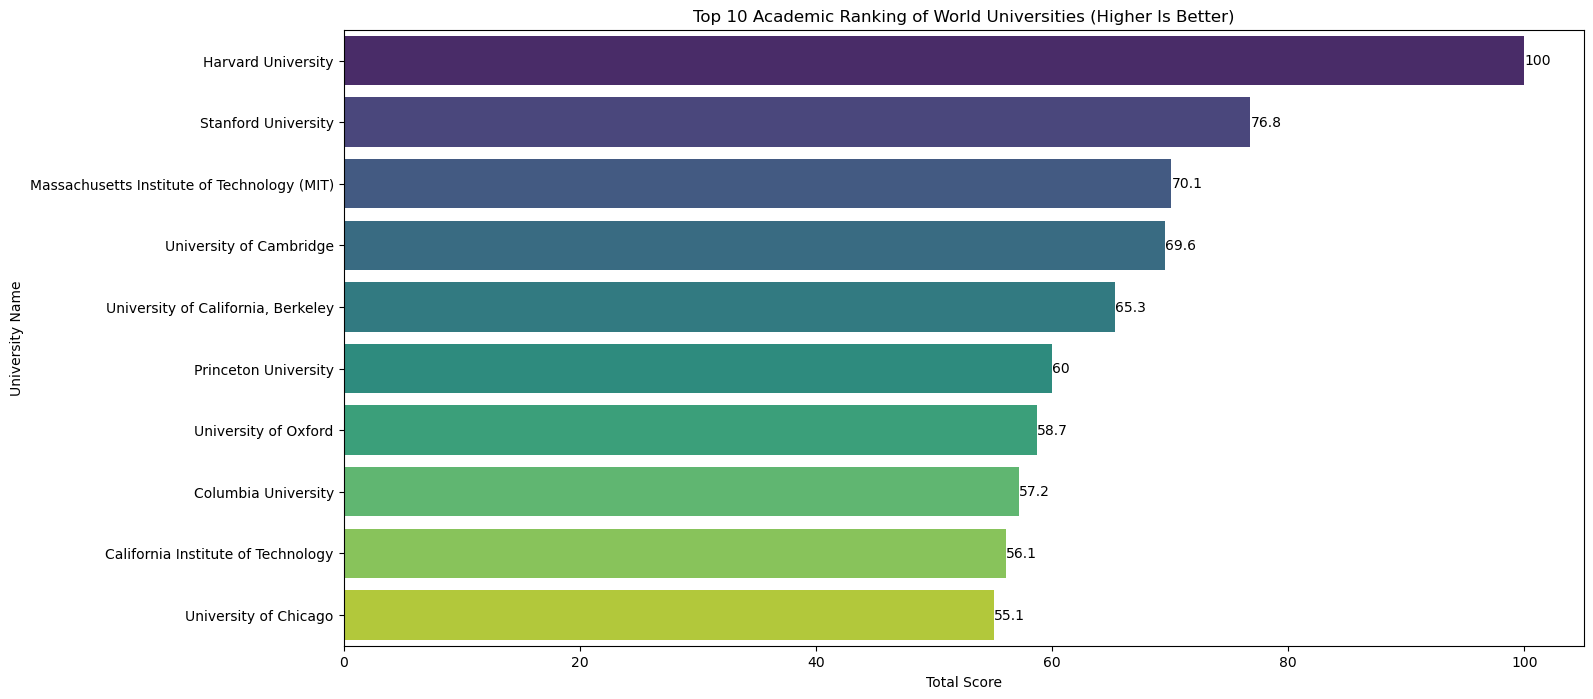

In [861]:
plt.figure(figsize=(16,8))
plt.title('Top 10 Academic Ranking of World Universities (Higher Is Better)')
t = sns.barplot(x='Total Score', y='University Name', data=shangahai_rank_df[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])

[Text(0, 0, '100'),
 Text(0, 0, '96.7'),
 Text(0, 0, '95.2'),
 Text(0, 0, '94.1'),
 Text(0, 0, '93.3'),
 Text(0, 0, '92.6'),
 Text(0, 0, '92.1'),
 Text(0, 0, '91.6'),
 Text(0, 0, '91.2'),
 Text(0, 0, '90.8')]

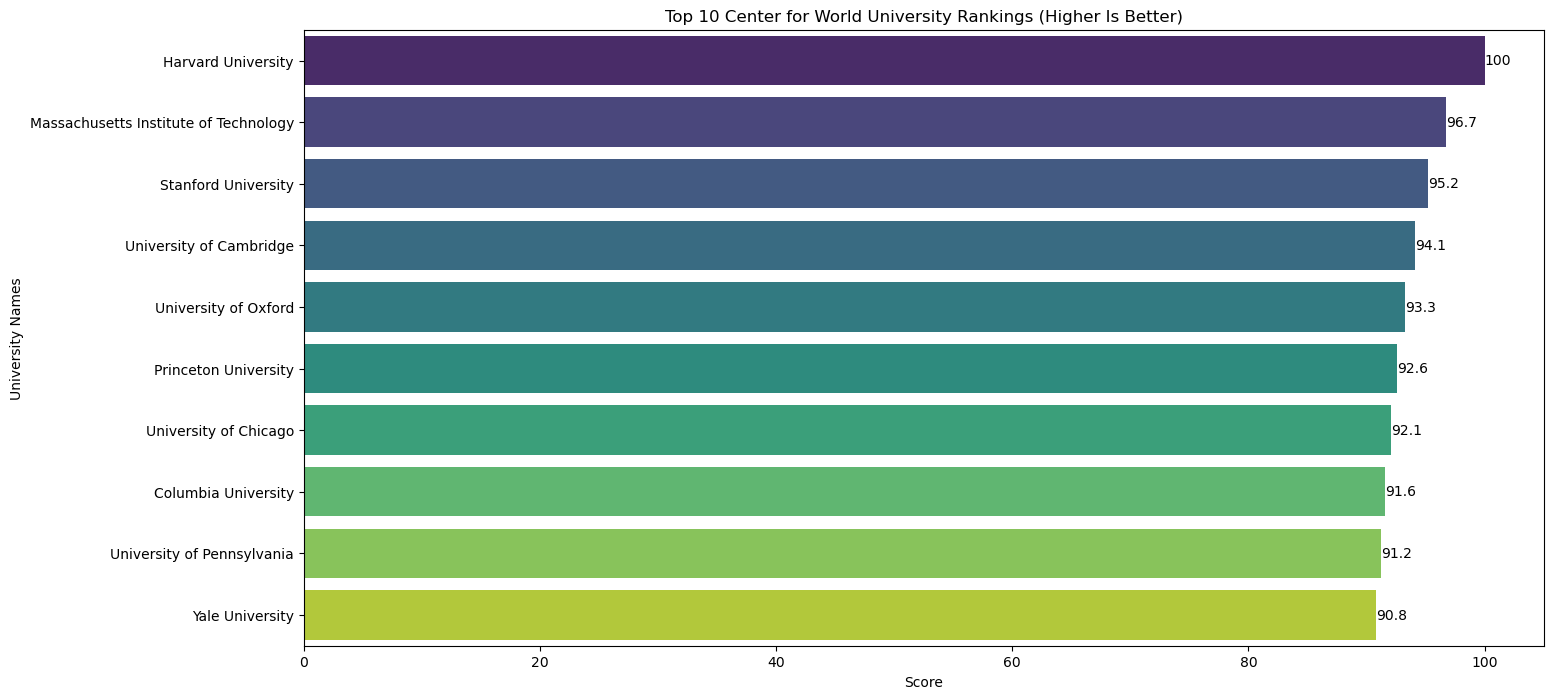

In [851]:
plt.figure(figsize=(16,8))
plt.title('Top 10 Center for World University Rankings')
t = sns.barplot(x='Score', y='University Names', data=world_rank_df[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])

/tmp/ipykernel_45504/2596024408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_t['scores'] = top10_t['scores'].astype(float)


[Text(0, 0, '99.4'),
 Text(0, 0, '97.5'),
 Text(0, 0, '97.2'),
 Text(0, 0, '96.9'),
 Text(0, 0, '96.6'),
 Text(0, 0, '96.5'),
 Text(0, 0, '96.4'),
 Text(0, 0, '96.4'),
 Text(0, 0, '95.8'),
 Text(0, 0, '95.8')]

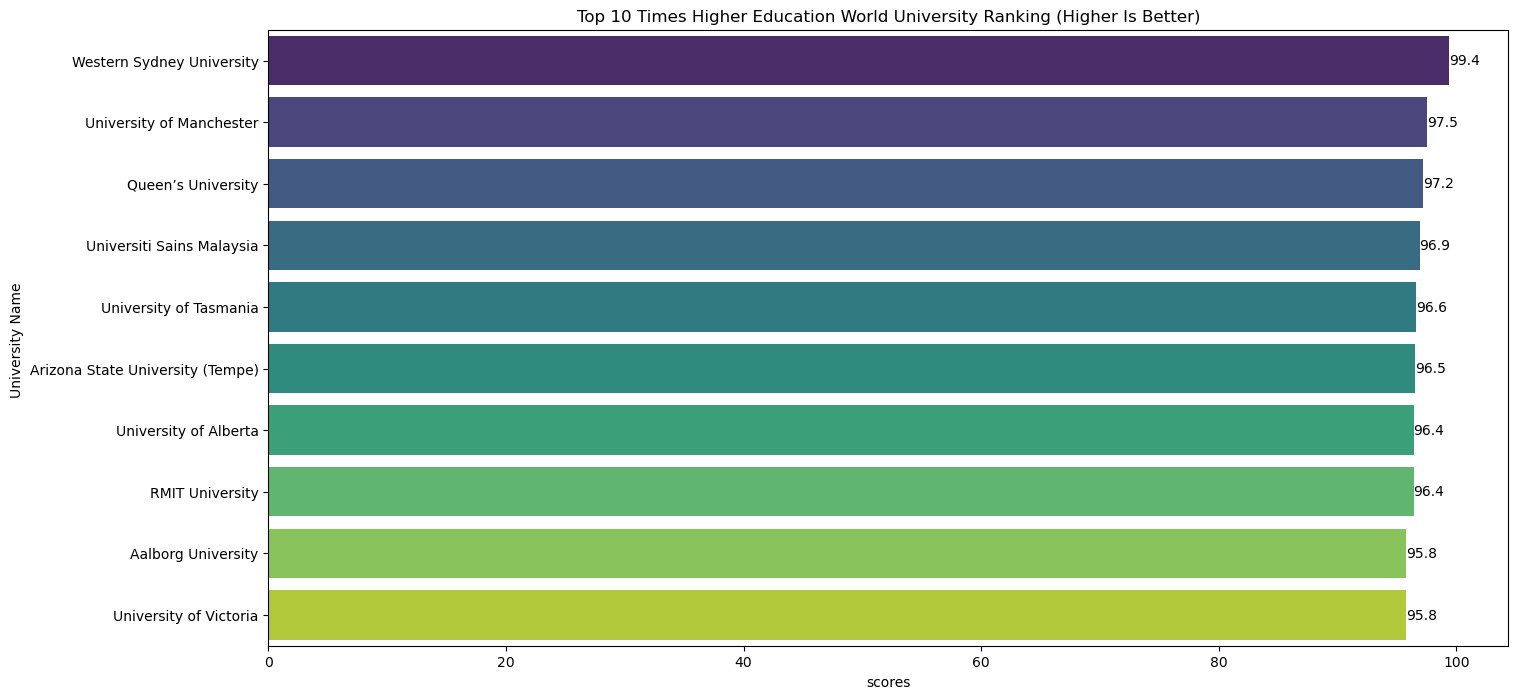

In [853]:
top10_t = times_rank_df.head(10)
top10_t['scores'] = top10_t['scores'].astype(float)

plt.figure(figsize=(16,8))
plt.title('Top 10 Times Higher Education World University Ranking (Higher Is Better)')
t = sns.barplot(x='scores', y='University Name ', data=top10_t[:10], palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])

/tmp/ipykernel_45504/3849698282.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = world_rank_df.sort_values(by="Employability Rank")[world_rank_df["Employability Rank"] != 0].head(10)


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

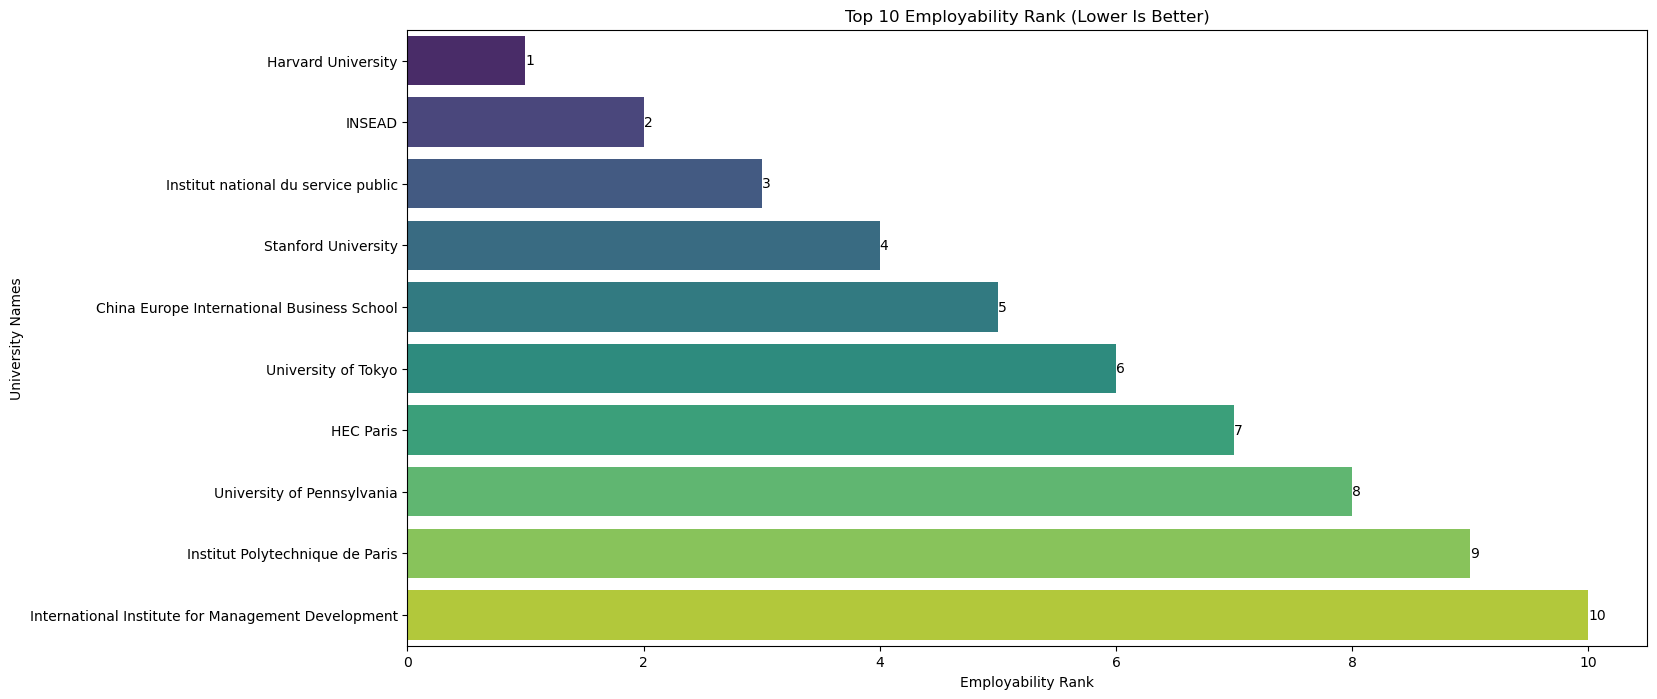

In [835]:
a = world_rank_df.sort_values(by="Employability Rank")[world_rank_df["Employability Rank"] != 0].head(10)

plt.figure(figsize=(16,8))
plt.title('Top 10 Employability Rank (Lower Is Better)')
t = sns.barplot(x='Employability Rank', y='University Names', data=a, palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])

[Text(0, 0, '245'),
 Text(0, 0, '279'),
 Text(0, 0, '352'),
 Text(0, 0, '657'),
 Text(0, 0, '1311'),
 Text(0, 0, '1447'),
 Text(0, 0, '1509'),
 Text(0, 0, '1547'),
 Text(0, 0, '1586'),
 Text(0, 0, '1711'),
 Text(0, 0, '1742'),
 Text(0, 0, '1762'),
 Text(0, 0, '1811'),
 Text(0, 0, '1907'),
 Text(0, 0, '1974'),
 Text(0, 0, '1979')]

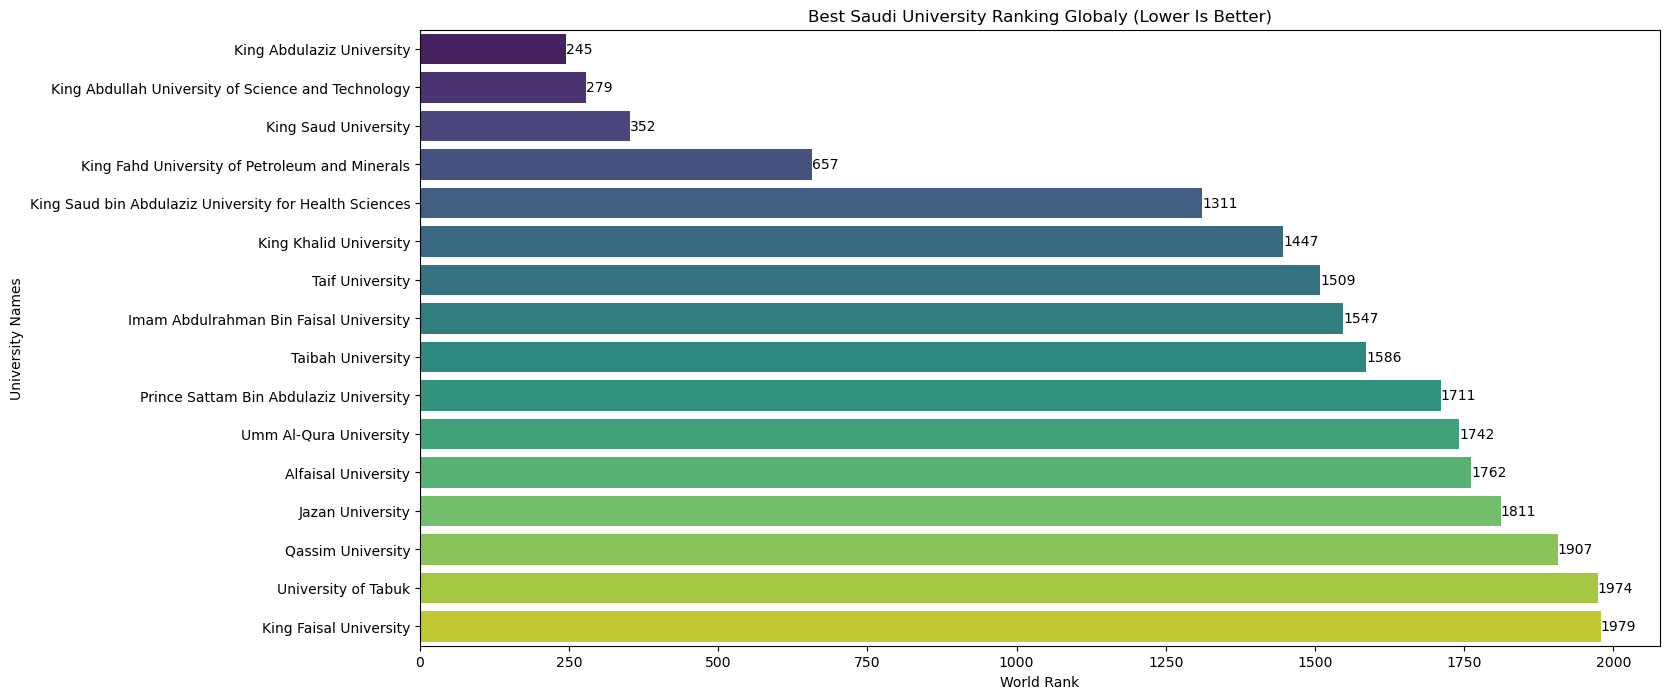

In [836]:
a = world_rank_df[world_rank_df['Location '] == 'Saudi Arabia']

plt.figure(figsize=(16,8))
plt.title('Best Saudi University Ranking Globaly (Lower Is Better)')
t = sns.barplot(x='World Rank', y='University Names', data=a, palette = 'viridis', width = 0.8)
t.bar_label(t.containers[0])

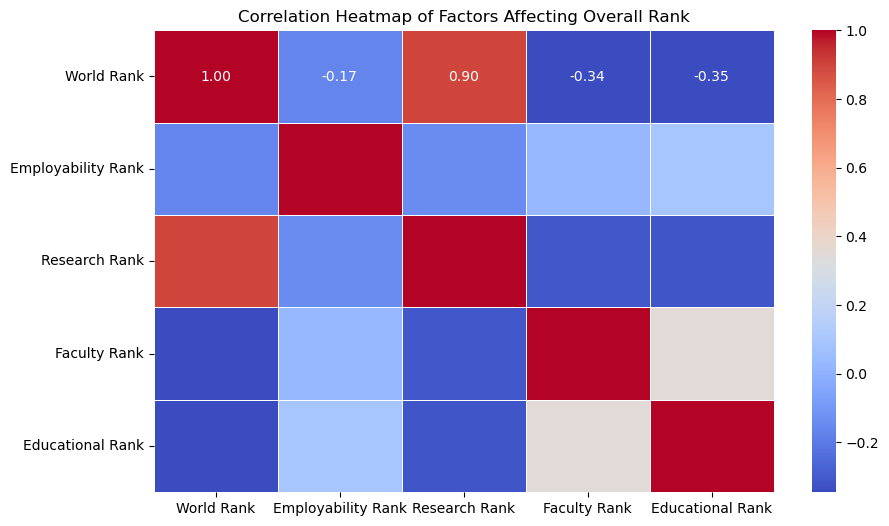

In [838]:
correlation_matrix = world_rank_df[['World Rank', 'Employability Rank', 'Research Rank', 'Faculty Rank', 'Educational Rank']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors Affecting Overall Rank')
plt.show()

In [840]:
world_rank_df.head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
1,1,Harvard University,USA,1,1,1,1,1,100.0
2,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
3,3,Stanford University,USA,3,11,4,2,2,95.2
4,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
5,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
6,6,Princeton University,USA,4,5,16,6,82,92.6
7,7,University of Chicago,USA,5,8,15,22,28,92.1
8,8,Columbia University,USA,6,12,14,10,13,91.6
9,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
10,10,Yale University,USA,8,6,35,13,21,90.8


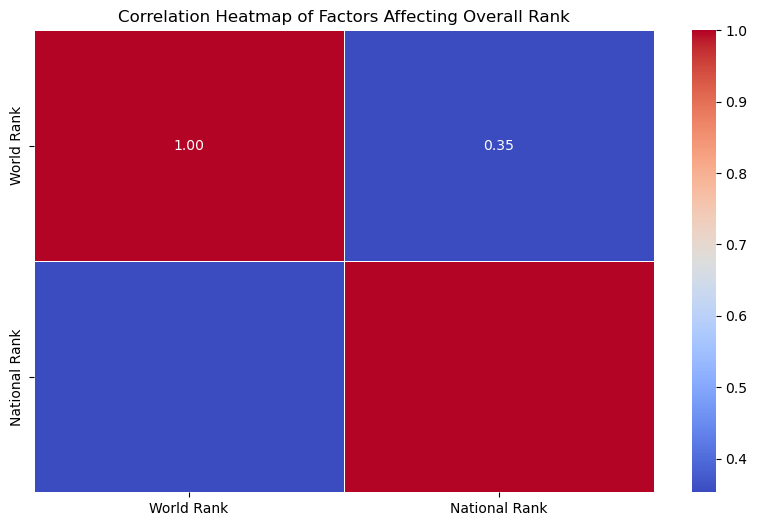

In [847]:
correlation_matrix = world_rank_df[['World Rank', 'National Rank']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors Affecting Overall Rank')
plt.show()

In [885]:
e = times_rank_df[:101].groupby(by = 'Location').size().sort_values(ascending = False)

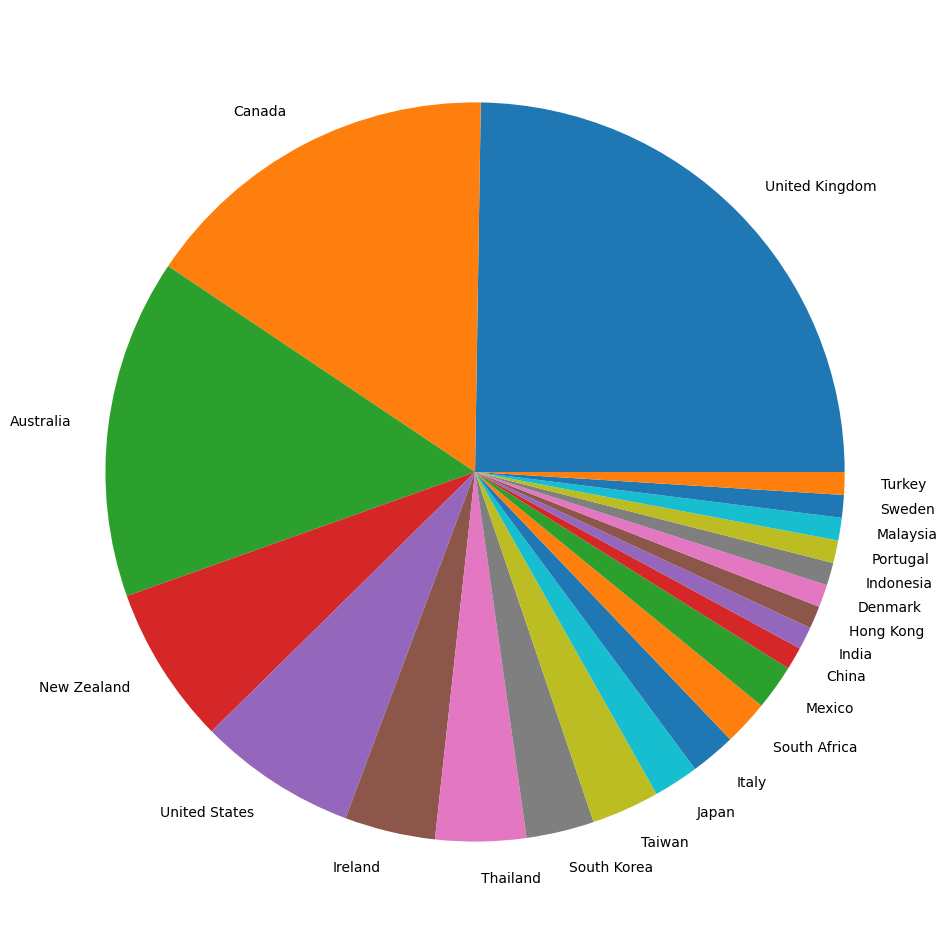

In [913]:
plt.figure(figsize=(15, 12))
plt.pie(e, labels = e.index)
plt.show()

In [883]:
f = world_rank_df[:101].groupby(by = 'Location ').size().sort_values(ascending = False)

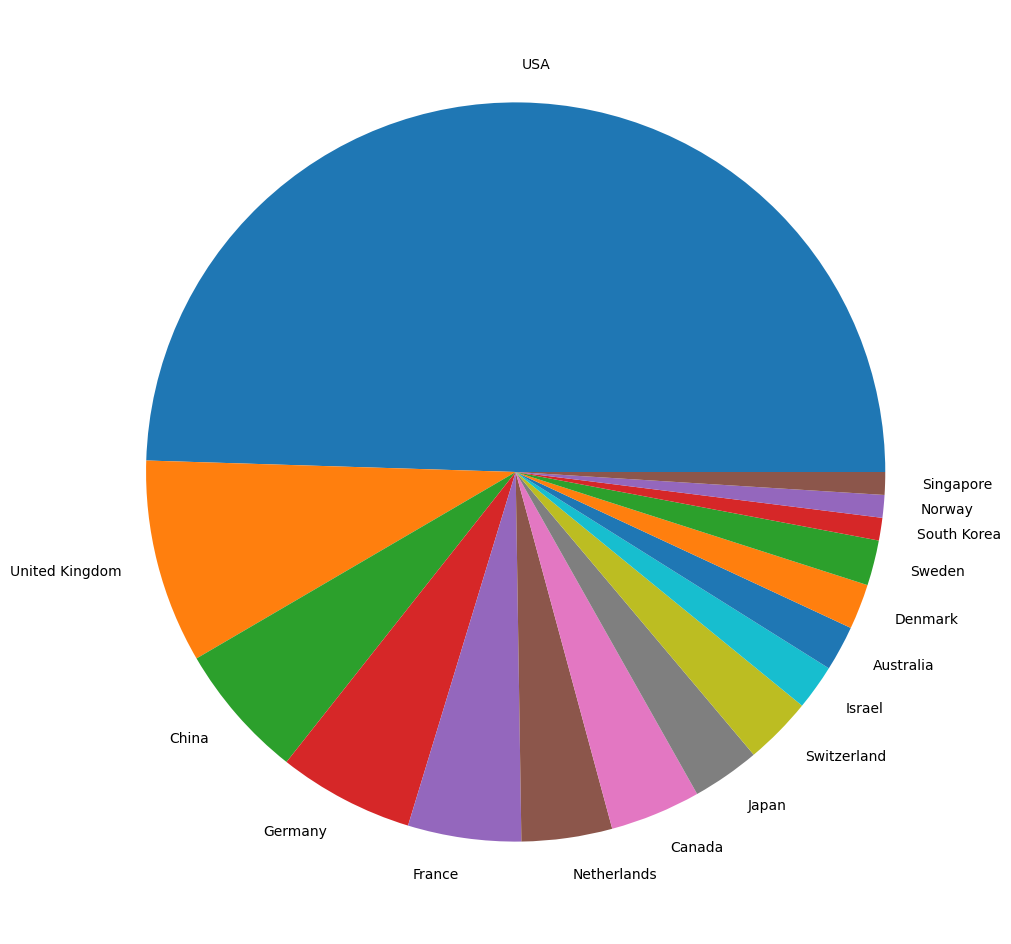

In [915]:
plt.figure(figsize=(15, 12))
plt.pie(f, labels = f.index)
plt.show()


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.